# DEBUG: Solve KEs complete case

In [18]:
# TODO: choose crazy beta values for bumps behavior
# or small N

In [8]:
import numpy as np
import matplotlib.pylab as plt

import sys
sys.path.append('../tests/')
from test_solving_KEs_complete import *

In [9]:
"""Complete case test."""
# setup
nsims = 10 # number of simulation runs
time_max = 10   # maximum time duration


# TODO: increase these values
N = 4 
I0 = 1 
t_max = 10

beta1 = 2 / N       # pairwise infection rate
beta2 = 4 / (N**2)  # hyperedge contagion rate
mu    = 1           # recovery rate

print(f"Setup: \n")
print(f"\tH = Complete Hypergraph, N = {N}, I0 = {I0}\n")
print(f"\tbeta1 = {beta1}, beta2 = {beta2}, mu = {mu}\n")

Setup: 

	H = Complete Hypergraph, N = 4, I0 = 1

	beta1 = 0.5, beta2 = 0.25, mu = 1



In [13]:
M = N + 1 # number of all states

# set the initial condition
p0 = np.zeros(M)
p0[I0] = 1.0 # all other states have prob 0 at time 0
print(f"p0 = {p0}")

# time range and times to evaluate solution
nsteps = 101
t_span = (0.0, time_max)
t_eval = np.linspace(t_span[0], t_span[1], nsteps)

p0 = [0. 1. 0. 0. 0.]


In [15]:
# Solve KEs
ode_system_complete = list_all_ODEs_complete(N, beta1, beta2, mu)

def f_ode(t, p):
    return ode_system_complete(t, p)

sol = solve_ivp(f_ode, 
                t_span, 
                p0, 
                t_eval=t_eval,
                method="RK45"
)

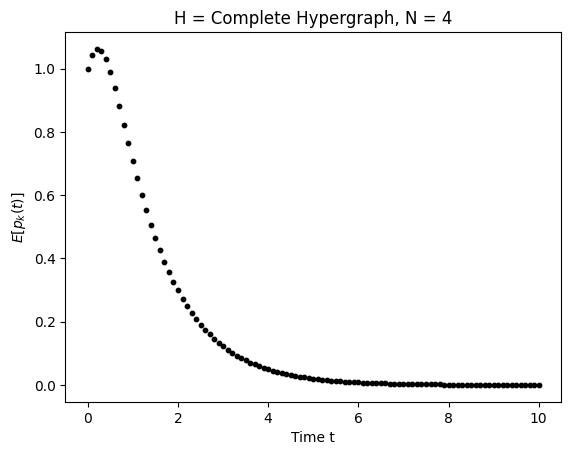

In [17]:
# plot the expected values of p_{k}(t) over time t
expected_values = calculate_expected_values(sol)
plt.figure()
plt.scatter(sol.t, expected_values, s = 10, color="k", 
            label=r"Expected values $E[p_{k}(t)]$")
plt.xlabel("Time t")
plt.ylabel(r"$E[p_{k}(t)]$")
# plt.legend()
plt.title(f"H = Complete Hypergraph, N = {N}")
plt.show()